# SEER Breast Cancer Analysis

In this notebook, we will practice filtering and visualizing the data from the [SEER](https://seer.cancer.gov/) (Surveillance, Epidemiology, and End Results) research database.  The SEER Program of the NIH/NCI (National Institutes of Health/National Cancer Institute) provides information on cancer statistics in an effort to reduce the cancer burden among the U.S. population. 

We will stratify our data to mimic the analysis in "Breast Cancer Stage Variation and Survival in Association With Insurance Status and Sociodemographic Factors in US Women 18 to 64 Years Old" by Hsu, et. al (2017). [Link to Full Paper.](http://rdcu.be/Gdvp/)

For now, we will just look at the distributions along certain slices of the dataset.  (Later on, we will use this data to practice adjusting for confounders, distribution fitting, and hypothesis testing.)


In [2]:
import pandas as pd
from os import path
import csv
import numpy as np
from time import time
import re
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import pickle
table,records = pickle.load(open("seer_synthetic.p", "rb"))
table.head(10)

,Patient ID number,Sex,Survival months,Age Group,Marital Group,"Race recode (W,B,AI,API)",Insurance recode,Hormone Receptor,Cancer Stage Num,Early Late Stage
0,0,2,78,2,2,1,3,1.0,1.0,1.0
0,1,2,88,1,2,1,3,1.0,2.0,1.0
0,2,2,60,2,2,1,4,1.0,1.0,1.0
0,3,2,86,2,1,2,3,2.0,1.0,1.0
0,4,2,56,1,2,1,3,2.0,4.0,2.0
0,5,2,89,2,2,1,4,1.0,2.0,1.0
0,6,2,84,2,2,1,3,1.0,1.0,1.0
0,7,2,80,2,1,1,3,1.0,1.0,1.0
0,8,2,59,2,2,1,3,1.0,2.0,1.0
0,9,2,67,2,2,1,3,1.0,1.0,1.0


# Visualize the Data!

Before we do any analysis, let's look at what the data actually looks like using matplotlib!

## Plot Distributions

Here we will see how breast cancer survival is distributed across different strata of covariates.  Notice how Survival Months (y-axis) is significantly correlated with some covariates.


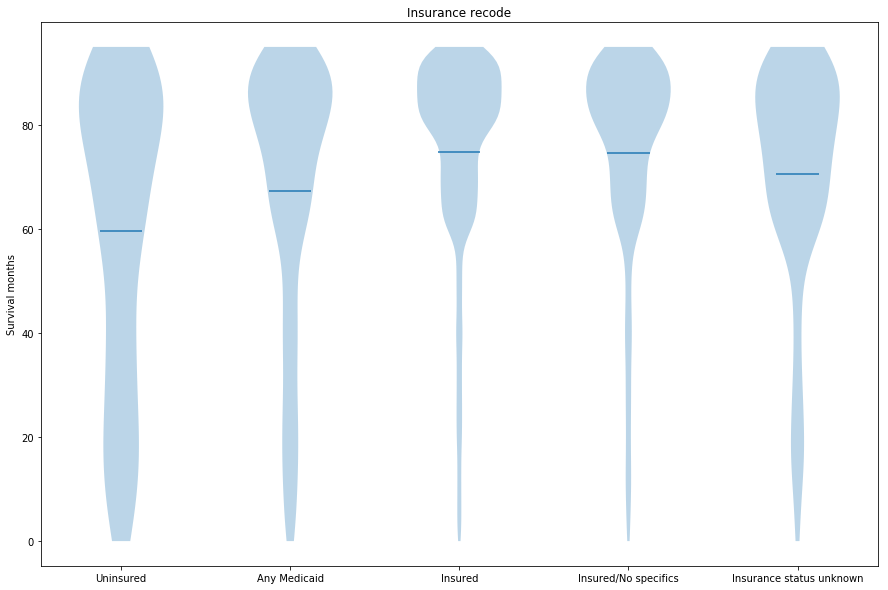

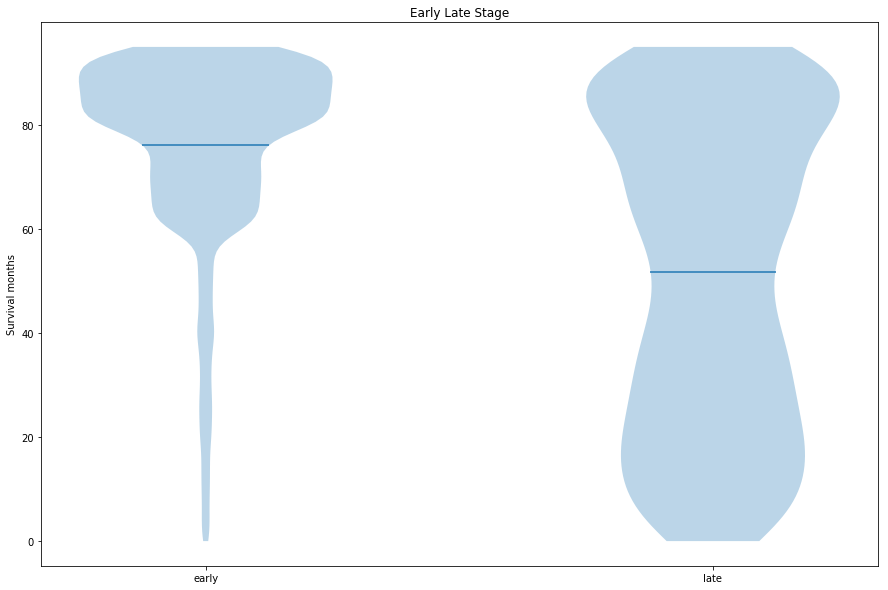

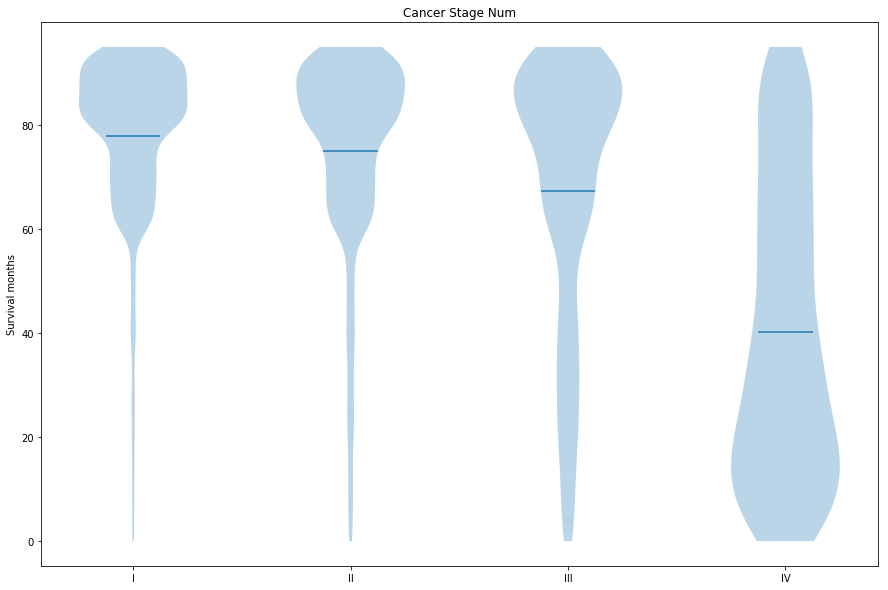

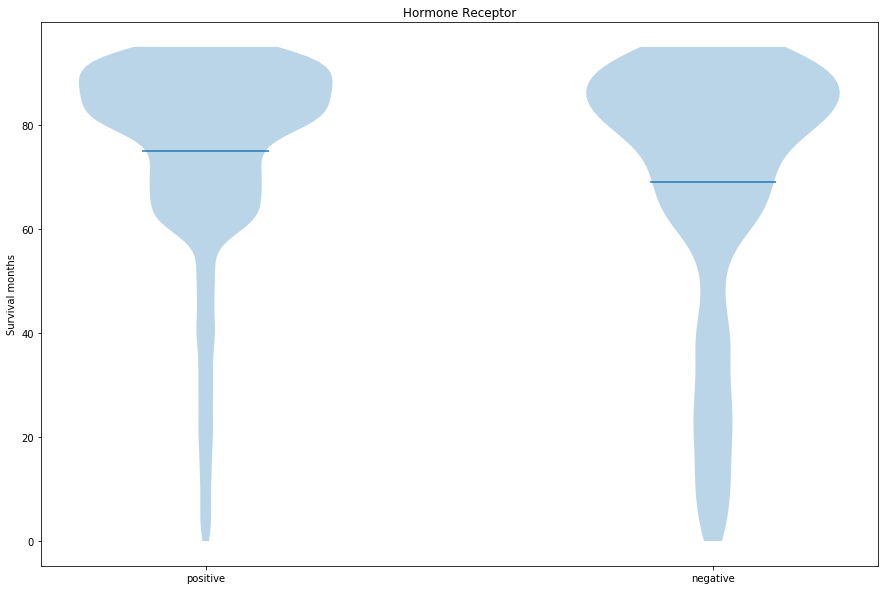

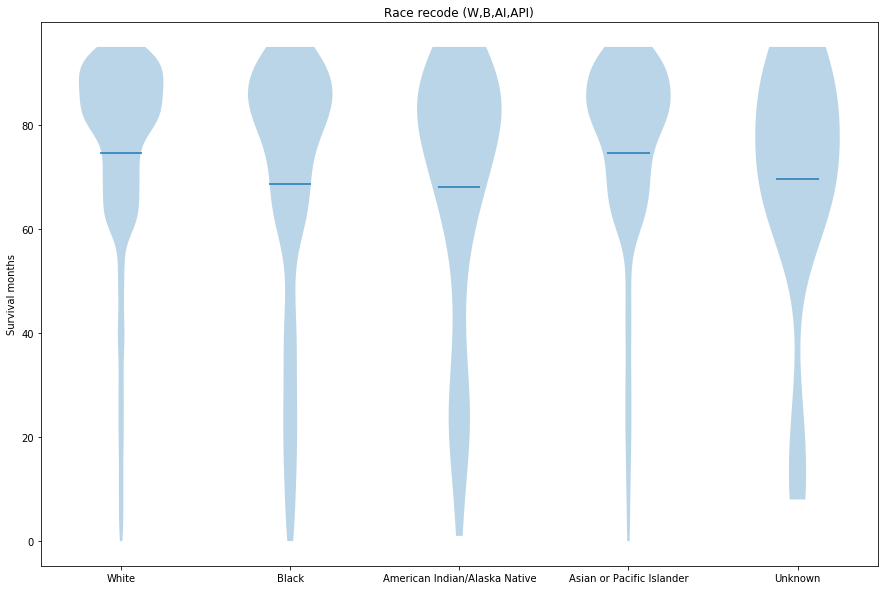

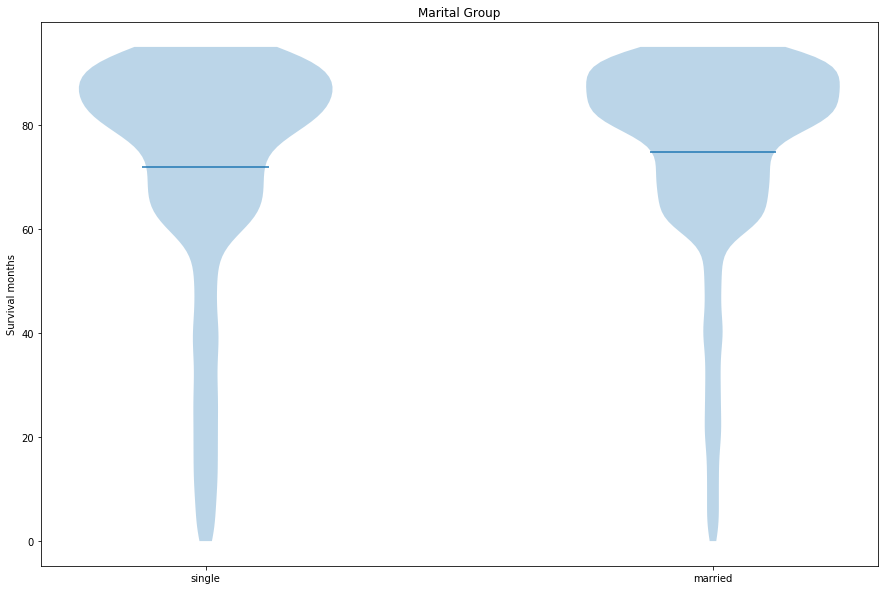

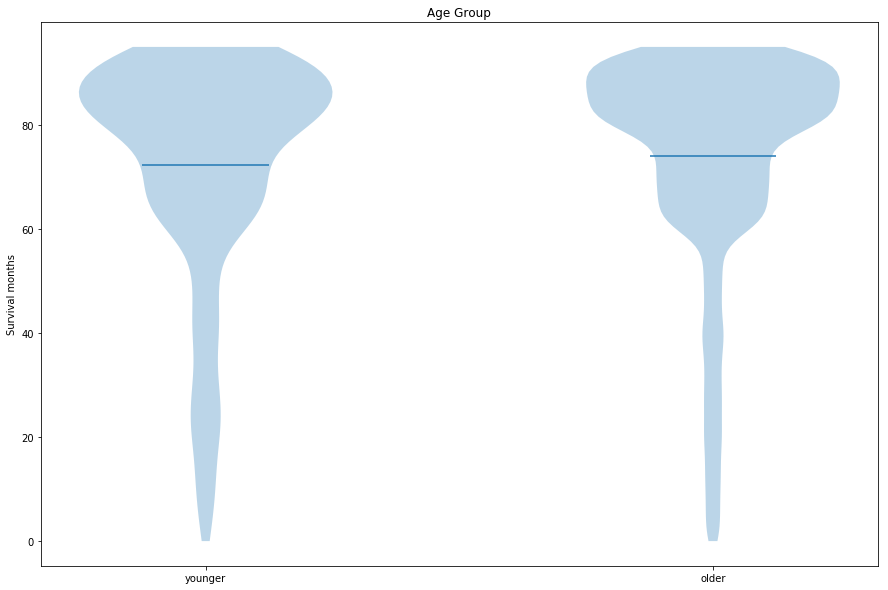

In [3]:
covariates = ['Insurance recode','Early Late Stage','Cancer Stage Num','Hormone Receptor',
          'Race recode (W,B,AI,API)','Marital Group','Age Group']
ylabel = 'Survival months'

# make a plot for each covariate
for cov in covariates:
    
    # identify the covariate strata within the data
    vals = np.unique(table[cov].values)
    
    # group the data by strata
    table_subset = [list(table[table[cov] == x][ylabel].values) for x in vals]

    # plot approximate distributions using violinplot
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    plt.violinplot(table_subset, positions=range(len(vals)),showmeans=True,showextrema=False)

    xlabels=[records[cov]['codes'][v] for v in vals]
    ax.set_xticks(range(len(vals)))
    ax.set_xticklabels(xlabels)
    ax.set_ylabel(ylabel)
    ax.set_title(cov)
    plt.show()

## Plot histograms

Here we visualize how the cancer stage at diagnosis is distributed across different strata of covariates.  Below each plot is the associated contingency table.

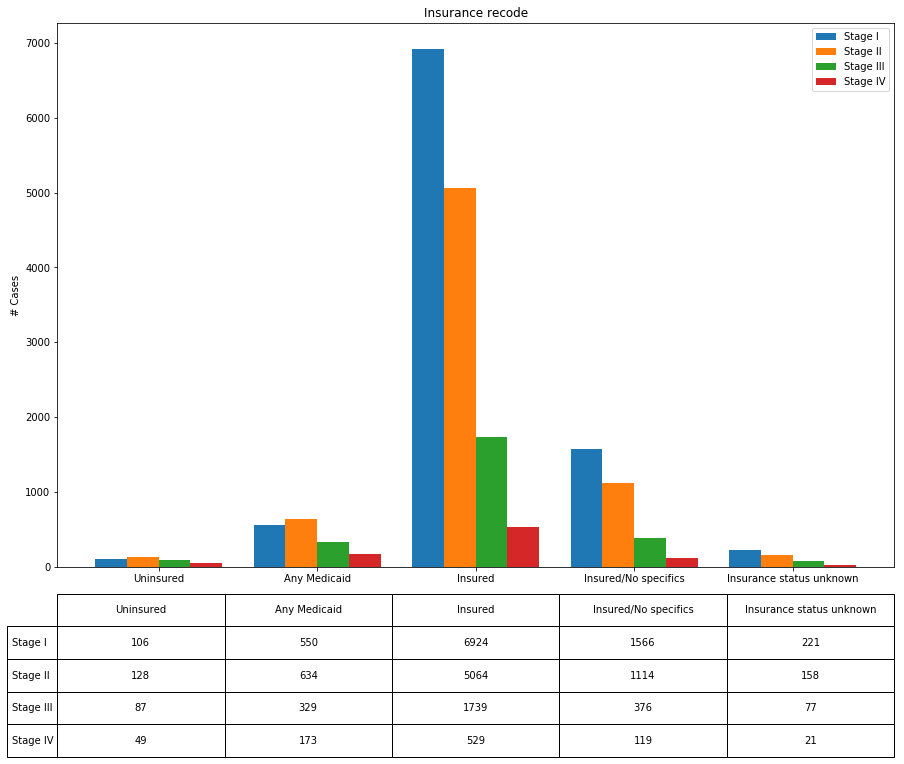

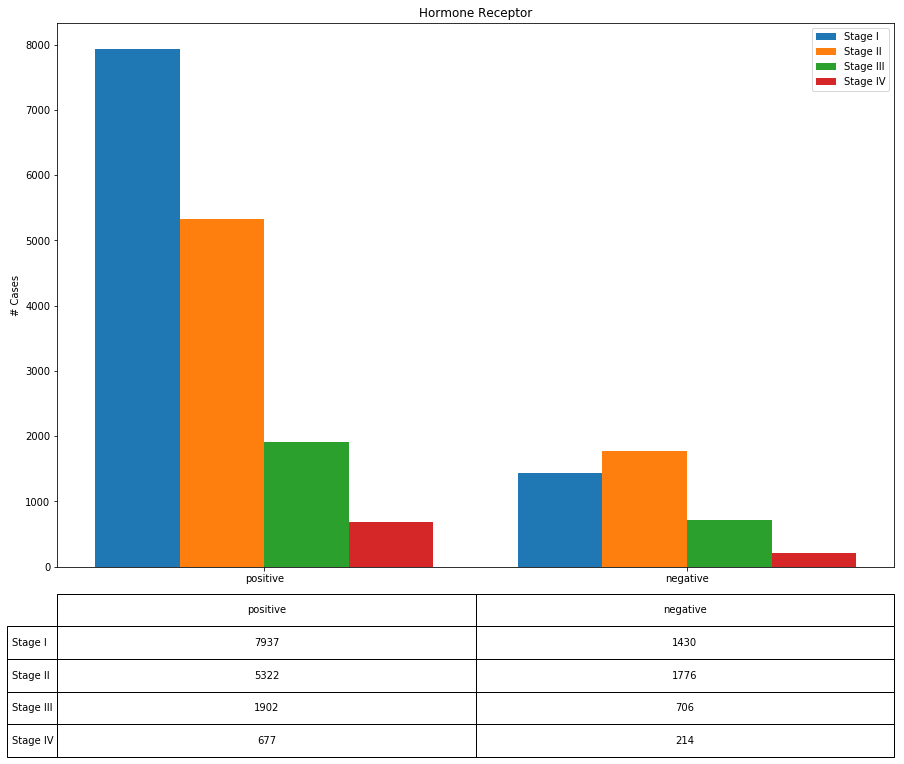

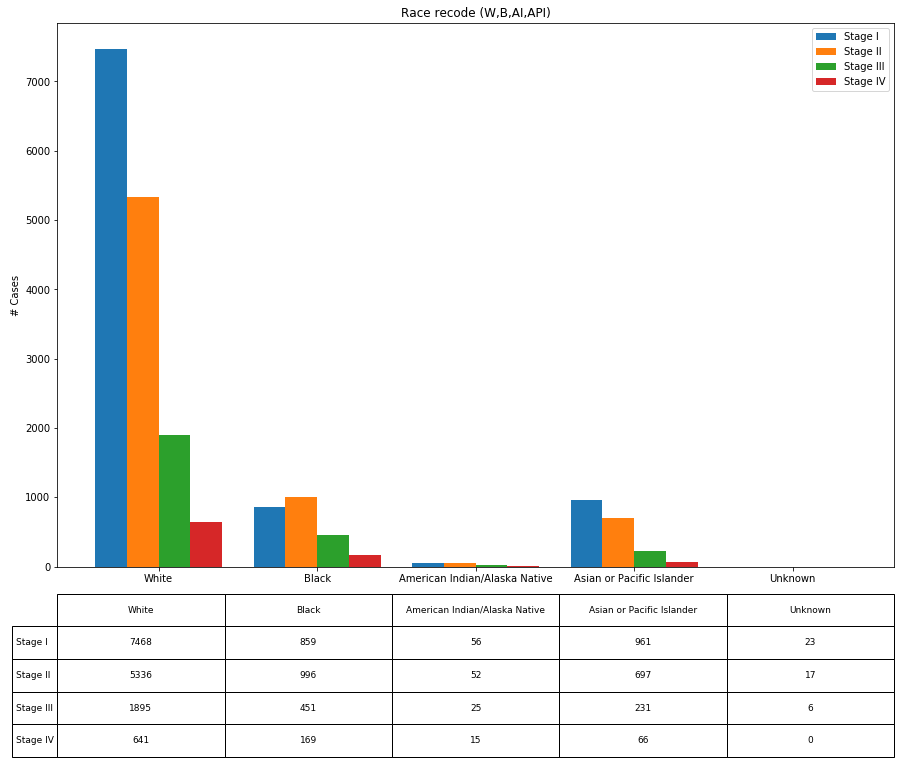

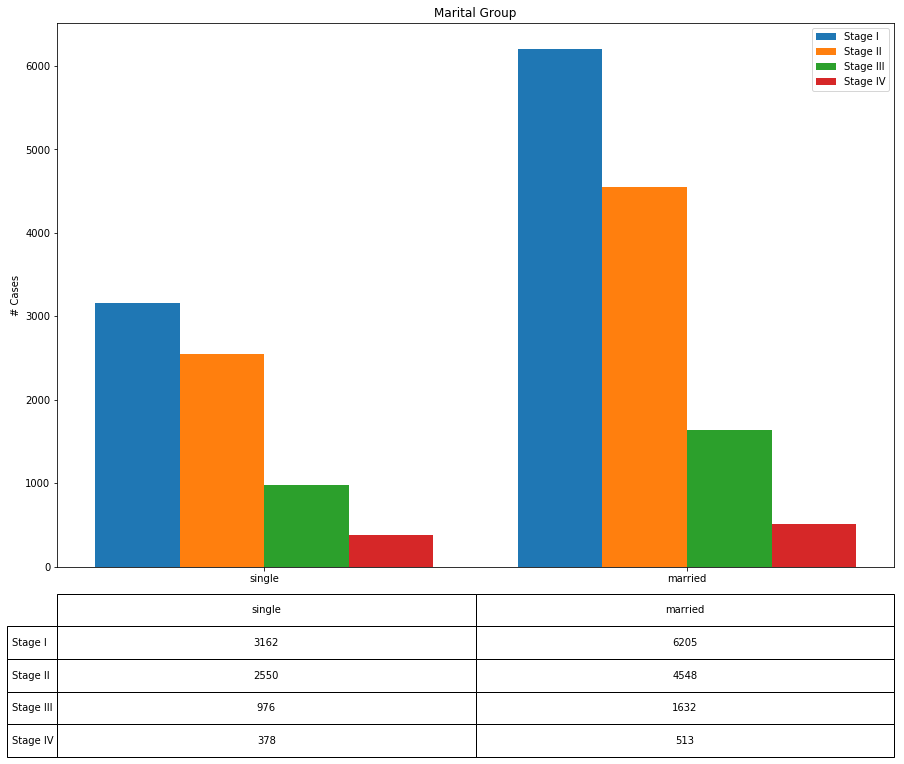

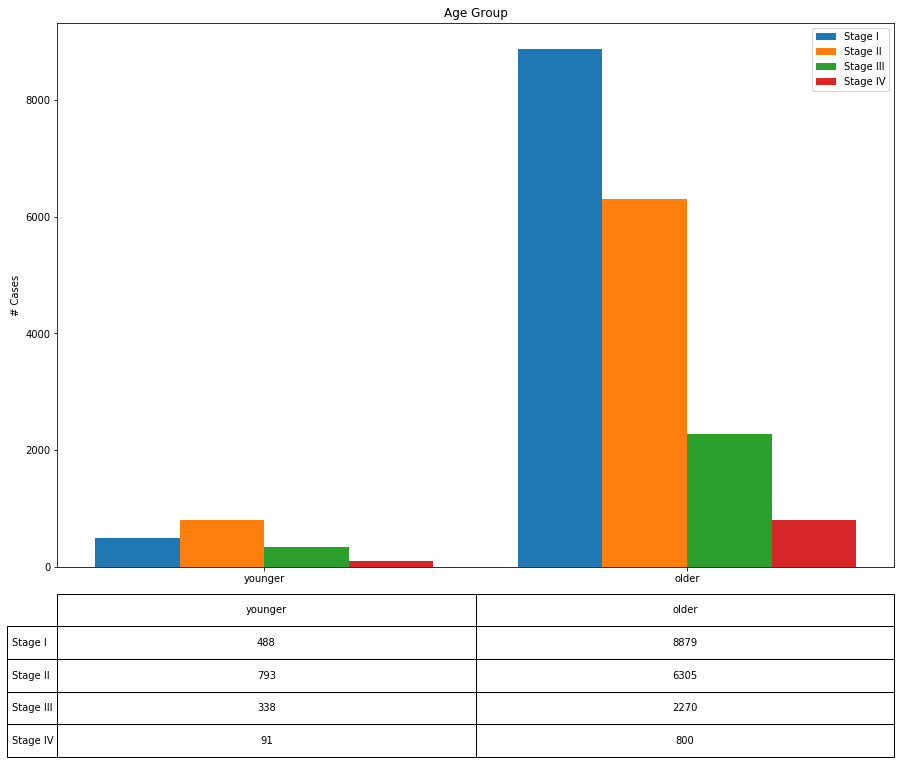

In [4]:
covariates = ['Insurance recode','Hormone Receptor','Race recode (W,B,AI,API)','Marital Group','Age Group']
stagelabel = 'Cancer Stage Num'

stagevals = np.unique(table[stagelabel].values)

# make a plot for each covariate
for cov in covariates:

    # identify the covariate strata within the data
    vals = np.unique(table[cov].values)
    
    # initialize the contingency table
    ctable = np.ndarray((stagevals.size,vals.size), dtype='int')
    
    # group the data 
    table_subset = [table[table[stagelabel] == stagevals[v]][cov].values for v in range(stagevals.size)]
    
    # populate entries in the contingency table
    for v in range(stagevals.size):
        for g in range(vals.size):           
            ctable[v,g] = sum(table[table[stagelabel] == stagevals[v]][cov].values==vals[g])
            
    xlabels=[records[cov]['codes'][p] for p in vals]
        
    # plot the histogram and contingency table
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    plt.hist(table_subset,bins=np.arange(0.5, len(vals)+1.5, 1))
    ax.set_xticks(np.arange(1, len(vals)+1, 1))
    ax.set_xticklabels(xlabels)
    plt.ylabel('# Cases')
    plt.legend(stagevals)
    plt.legend(['Stage '+records[stagelabel]['codes'][b] for b in stagevals])
    
    # display the contingency table
    plt.table(cellText=ctable,
              colLabels=xlabels,
              rowLabels=['Stage '+records[stagelabel]['codes'][b] for b in stagevals],
              loc='bottom', 
              bbox=[0, -0.35, 1, 0.3],
              cellLoc='center')
    
    plt.title(cov)
    plt.show()
    print('\n\n')


